<a href="https://colab.research.google.com/github/Vashaniverma/project_in_python/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis **

In [ ]:
import zipfile
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Specify the path to your ZIP file
zip_path = 'twitter_training.zip'

# Extract and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Assuming the CSV file is named "twitter_training.csv" inside the ZIP
    csv_filename = zip_ref.namelist()[0]  # Get the name of the first file
    zip_ref.extract(csv_filename, 'extracted_data/')  # Extract to a folder

column_names = ['ID', 'Category', 'Sentiment', 'Text']
data = pd.read_csv(f'extracted_data/{csv_filename}', header=None, names=column_names)

# Display the first few rows to verify it loaded correctly
print(data.head())


     ID     Category Sentiment  \
0  2401  Borderlands  Negative   
1  2401  Borderlands  Negative   
2  2401  Borderlands  Negative   
3  2401  Borderlands  Negative   
4  2401  Borderlands  Negative   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Assuming the dataset has 'text' and 'sentiment' columns
texts = data['Text']
labels = data['Sentiment']  # Ensure labels are in a binary or categorical format

# Check for NaN values and handle them
if texts.isnull().any():
    # Option 1: Drop rows with NaN values
    data = data.dropna(subset=['Text'])
    texts = data['Text']
    labels = data['Sentiment']


def handle_negations(text):
    # Replace negated words with a prefix (e.g., "not_happy")
    text = re.sub(r"\bnot\s+(\w+)", r"not_\1", text)

    # Define additional patterns for negations (you can expand this list)
    negation_patterns = [
        r"\b(?:never|no|nothing|nobody|nowhere|neither|not|kill|murder)\s+(\w+)",
        r"\b(?:don't|doesn't|didn't|can't|cannot|won't|wouldn't|shouldn't)\s+(\w+)",
    ]

    for pattern in negation_patterns:
        text = re.sub(pattern, r"not_\1", text)

    return text

# Apply negation handling to all text data
texts = texts.apply(handle_negations)

# Vectorization with CountVectorizer using bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)
y = labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)



# Evaluate each model
models = {'Naive Bayes': nb_model, 'Logistic Regression': logistic_model}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} - Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes - Accuracy: 0.6233783783783784
Naive Bayes - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.61      0.44      0.51      2696
    Negative       0.63      0.76      0.69      4381
     Neutral       0.65      0.49      0.56      3605
    Positive       0.60      0.72      0.66      4118

    accuracy                           0.62     14800
   macro avg       0.62      0.60      0.60     14800
weighted avg       0.62      0.62      0.62     14800

Logistic Regression - Accuracy: 0.712027027027027
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.72      0.58      0.64      2696
    Negative       0.77      0.78      0.78      4381
     Neutral       0.72      0.64      0.67      3605
    Positive       0.65      0.79      0.71      4118

    accuracy                           0.71     14800
   macro avg       0.71      0.70      0.70     14800
weighted

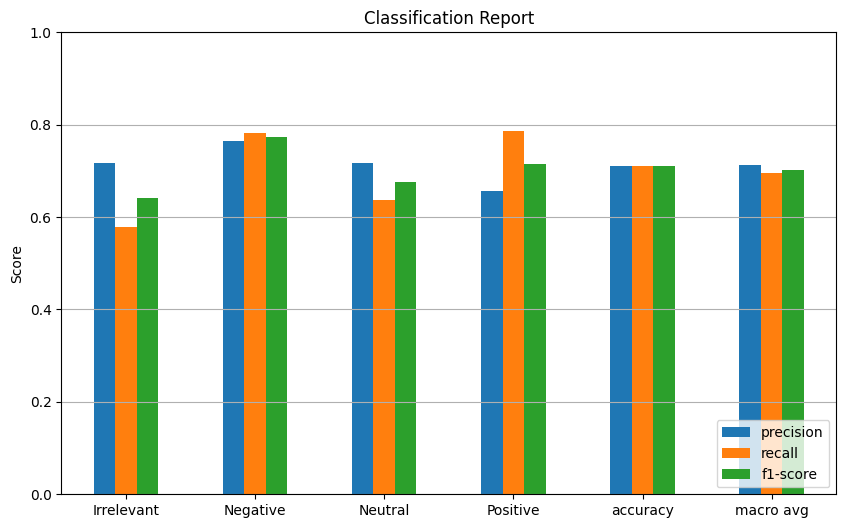

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, F1-Score
plt.figure(figsize=(10, 6))
report_df[:-1].plot(kind='bar', y=['precision', 'recall', 'f1-score'], ax=plt.gca())
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


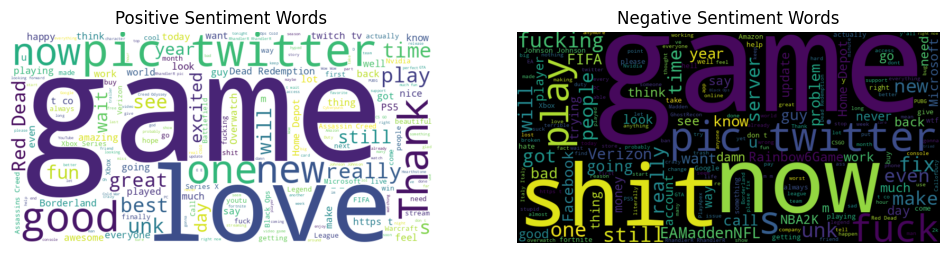

In [ ]:
from wordcloud import WordCloud

# Join all text for positive and negative sentiments
positive_texts = ' '.join(data[data['Sentiment'] == 'Positive']['Text'])
negative_texts = ' '.join(data[data['Sentiment'] == 'Negative']['Text'])

# Create word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words')

plt.show()


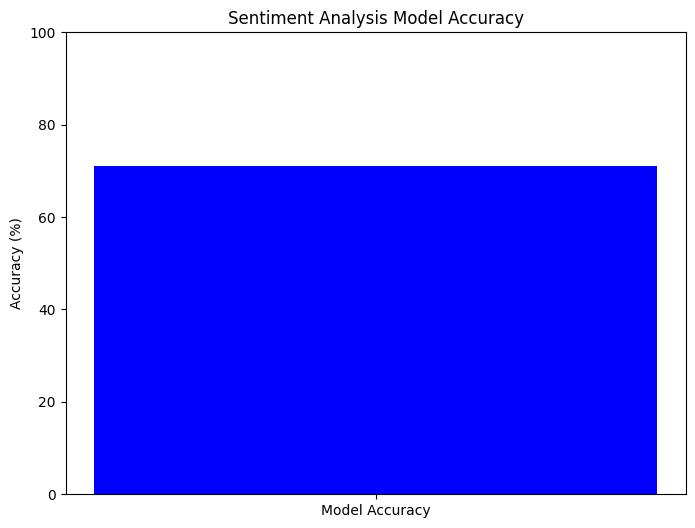

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already computed accuracy
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage

# Bar graph for model accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Model Accuracy'], [accuracy], color='blue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Model Accuracy')
plt.show()


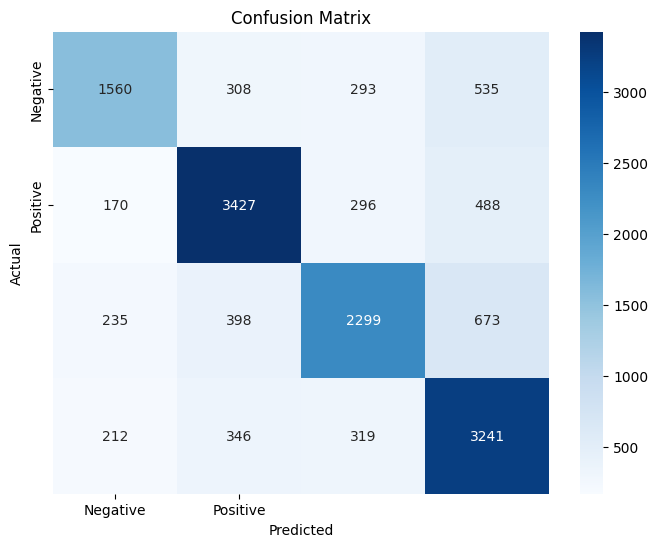

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


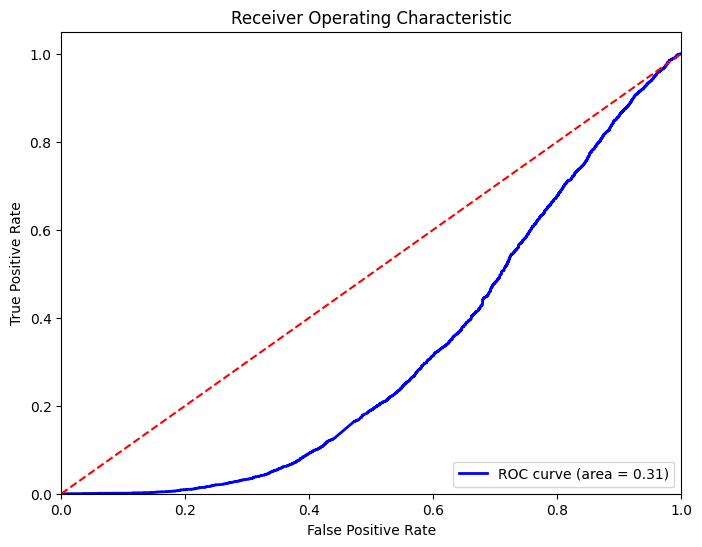

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is binary (0 and 1)
y_test_binary = (y_test == 'Positive').astype(int)  # Convert sentiments to binary
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Prediction function allowing model choice
def predict_sentiment(user_input, model_choice='nb'):
    # Preprocess user input with negation handling and vectorization
    user_input_processed = handle_negations(user_input)
    input_vector = vectorizer.transform([user_input_processed])

    # Choose model for prediction
    if model_choice == 'nb':
        prediction = nb_model.predict(input_vector)
    elif model_choice == 'logistic':
        prediction = logistic_model.predict(input_vector)
    else:
        print("Invalid model choice! Choose from 'nb', 'logistic'.")

    return prediction[0]

# Example usage
user_input = input("Enter your text for sentiment analysis: ")
model_choice = input("Choose model (nb, logistic): ")
sentiment = predict_sentiment(user_input, model_choice=model_choice)
print("Predicted Sentiment:", sentiment)

Enter your text for sentiment analysis: i am not happy
Choose model (nb, logistic): nb
Predicted Sentiment: Negative
